## Machine Learning Develop

In [1]:
# Import Packages
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

2024-01-16 09:49:11.329795: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-16 09:49:11.329837: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-16 09:49:11.331359: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-16 09:49:11.339630: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-16 09:49:12.285304: W tensorflow/compiler/tf2

we see the files we have in the train folder

In [2]:

import os

# Ruta de la carpeta que quieres listar
carpeta = '../data/raw/train/'

# Obtener la lista de archivos en la carpeta
archivos = os.listdir(carpeta)

# Imprimir los nombres de los archivos
for archivo in archivos:
    print(archivo)



I divide the dogs to one folder and the cats to another one 

In [3]:
import os
import shutil

# Rutas de la carpeta de origen y destino
carpeta_origen = '../data/raw/train/'
carpeta_destino = '../data/raw/dog/'

# Caracteres iniciales que deben coincidir para mover el archivo
caracteres_iniciales = 'dog'

# Obtener la lista de archivos en la carpeta de origen
archivos = os.listdir(carpeta_origen)

# Mover archivos que comienzan con los caracteres especificados
for archivo in archivos:
    if archivo.startswith(caracteres_iniciales):
        
        ruta_origen = os.path.join(carpeta_origen, archivo)
        ruta_destino = os.path.join(carpeta_destino, archivo)
        shutil.move(ruta_origen, ruta_destino)
        print(f"Se movió '{archivo}' a '{carpeta_destino}'.")


In [4]:
import os

# Ruta de la carpeta que quieres contar
carpeta = '../data/raw/dog/'

# Obtener la lista de archivos en la carpeta
archivos = os.listdir(carpeta)

# Contar el número de archivos
cantidad_archivos = len(archivos)

# Imprimir el resultado
print(f"La carpeta '{carpeta}' contiene {cantidad_archivos} archivo(s).")


La carpeta '../data/raw/dog/' contiene 12500 archivo(s).


In [5]:
import os
import shutil

# Rutas de la carpeta de origen y destino
carpeta_origen = '../data/raw/train/'
carpeta_destino = '../data/raw/cat/'

# Caracteres iniciales que deben coincidir para mover el archivo
caracteres_iniciales = 'cat'

# Obtener la lista de archivos en la carpeta de origen
archivos = os.listdir(carpeta_origen)

# Mover archivos que comienzan con los caracteres especificados
for archivo in archivos:
    if archivo.startswith(caracteres_iniciales):
        
        ruta_origen = os.path.join(carpeta_origen, archivo)
        ruta_destino = os.path.join(carpeta_destino, archivo)
        shutil.move(ruta_origen, ruta_destino)
        print(f"Se movió '{archivo}' a '{carpeta_destino}'.")

we see some of the dogs

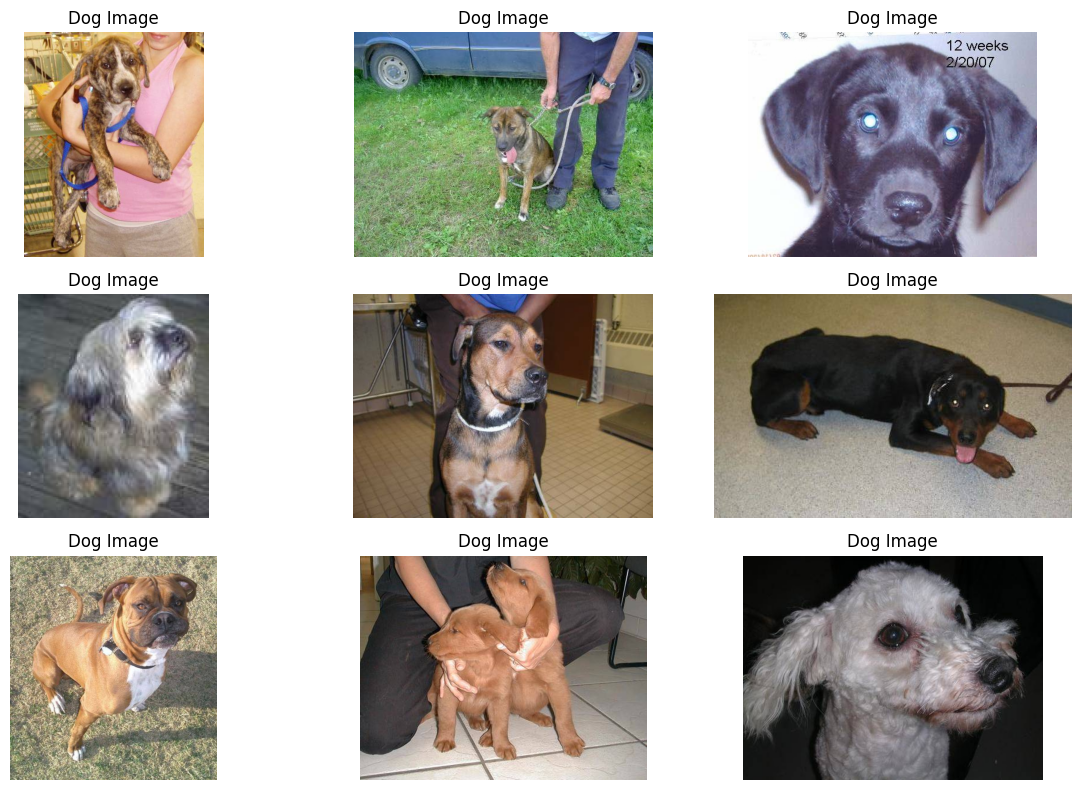

In [6]:
import os

# Path to the directory containing your image data
data_dir = "../data/raw"

# Get a list of all dog image file names
dog_subfolder = os.path.join(data_dir, "dog")

# Get a list of all dog image file names
dog_image_files = os.listdir(dog_subfolder)

# Load the first nine dog images
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)  # Adjust target_size as needed
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    dog_images.append(img_array)

# Create a single figure to display all nine images
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()


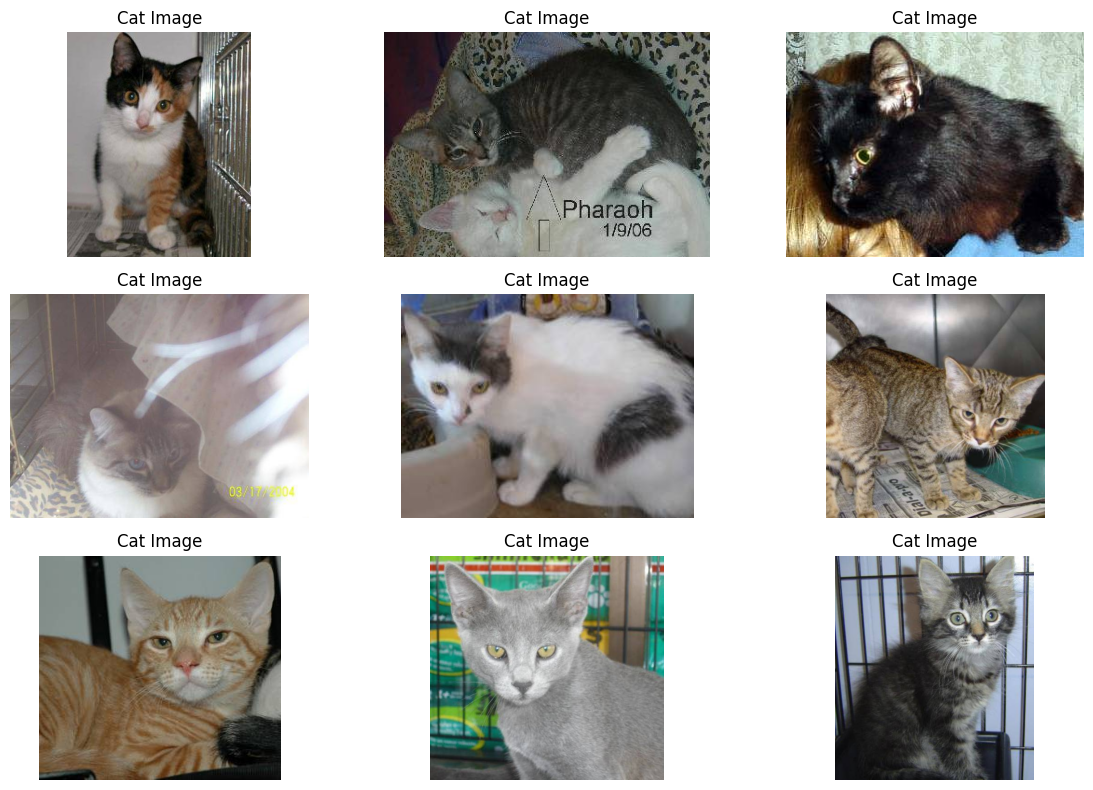

In [7]:

# Path to the directory containing your image data
data_dir = "../data/raw"

# Get a list of all dog image file names
dog_subfolder = os.path.join(data_dir, "cat")

# Get a list of all dog image file names
dog_image_files = os.listdir(dog_subfolder)

# Load the first nine dog images
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)  # Adjust target_size as needed
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    dog_images.append(img_array)

# Create a single figure to display all nine images
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()


In [8]:
from keras.preprocessing.image import ImageDataGenerator

# Define a few rules for DataGen
train_dir = "../data/raw"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"] 
)

# Test Data Generation
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["test1"] 
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


I have memory problems locally so I will be monitoring my memory and making adjustments to the code until I find something that works for me.

monitor my graphics card memory with `nvidia-smi -l 1`

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

# Convolutional layers
model.add(Conv2D(input_shape=(200, 200, 3), filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten layer
model.add(Flatten())

# Adjusted Dense layers
model.add(Dense(units=512, activation="relu"))  # Adjust based on the flattened shape
model.add(Dense(units=256, activation="relu"))

# Output layer
model.add(Dense(units=2, activation="softmax"))

2024-01-16 09:49:16.248328: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-16 09:49:16.297303: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-16 09:49:16.297687: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [10]:
# Compile the Model using Adam 
from keras.optimizers import Adam

# Compile the Model before Training
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])


In [11]:
import os
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'
print(os.getenv('TF_GPU_ALLOCATOR'))

cuda_malloc_async


In [13]:

batch_size = 2  # or any smaller value

model.fit(train_data, epochs=1, batch_size=batch_size)

782/782 [==============================] - 101s 129ms/step - loss: nan - accuracy: 0.5002


Save the model to use later

In [19]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_data, steps_per_epoch = 100, validation_data = test_data, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])


Epoch 1/3
100/100 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4866
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to ../models/vgg16_1.h5
100/100 [==============================] - 19s 191ms/step - loss: nan - accuracy: 0.4866 - val_loss: nan - val_accuracy: 1.0000
Epoch 2/3
100/100 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5116
Epoch 2: val_accuracy did not improve from 1.00000
100/100 [==============================] - 15s 149ms/step - loss: nan - accuracy: 0.5116 - val_loss: nan - val_accuracy: 1.0000
Epoch 3/3
100/100 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4997
Epoch 3: val_accuracy did not improve from 1.00000
100/100 [==============================] - 14s 144ms/step - loss: nan - accuracy: 0.4997 - val_loss: nan - val_accuracy: 1.0000


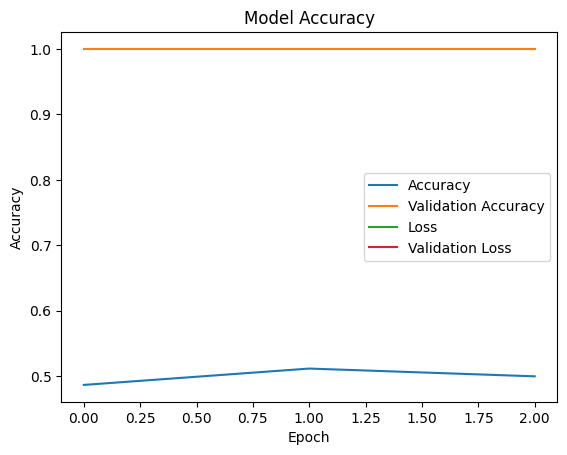

In [20]:


# Check the Accuracy of the Data

#Plot the Results
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configure the Plot Layout
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Plot
plt.show()



Try and predict images

1/1 [==============================] - 1s 534ms/step


2024-01-16 09:39:06.918483: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


dog


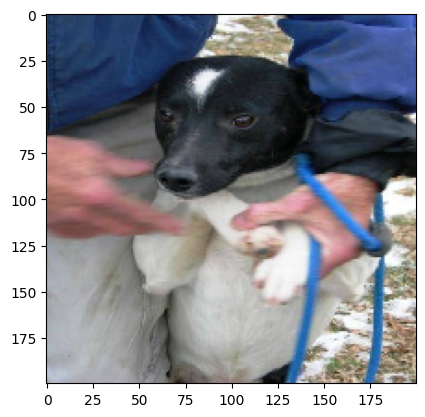

In [ ]:


from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("../data/raw/test1/1.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")

